## Data Exploration

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
#import xgboost as xgb
from time import time
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')
print(train.shape)
print(test.shape)
print(store.shape)
print(train['Date'].dtype)

"""print(train.head())
print()
print(test.head())
print()
print(store.head())"""
train.head().append(train.tail())
test.head().append(test.tail())
store.head().append(store.tail())
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)
(41088, 8)
(1115, 10)
object


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

          Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
479      480    622          4  2015-09-17   NaN      1            0   
1335    1336    622          3  2015-09-16   NaN      1            0   
2191    2192    622          2  2015-09-15   NaN      1            0   
3047    3048    622          1  2015-09-14   NaN      1            0   
4759    4760    622          6  2015-09-12   NaN      0            0   
5615    5616    622          5  2015-09-11   NaN      0            0   
6471    6472    622          4  2015-09-10   NaN      0            0   
7327    7328    622          3  2015-09-09   NaN      0            0   
8183    8184    622          2  2015-09-08   NaN      0            0   
9039    9040    622          1  2015-09-07   NaN      0            0   
10751  10752    622          6  2015-09-05   NaN      0            0   

       SchoolHoliday  
479                0  
1335               0  
2191               0  
3047               0  
4759               0

      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
7         8         a          a               7520.0   
8         9         a          c               2030.0   
9        10         a          a               3160.0   
15       16         a          c               3270.0   
22       23         d          a               4060.0   
24       25         c          a                430.0   
25       26         d          a               2300.0   
28       29         d          c               2170.0   
30       31         d          c               9800.0   
32       33         a          c               1320.0   
33       34         c          a               2240.0   
36       37         c          

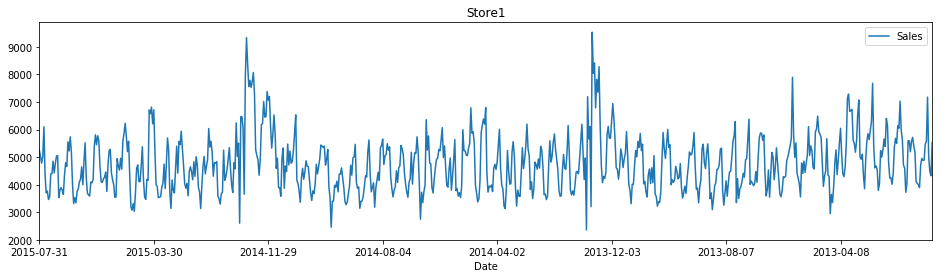

In [14]:
print(test[pd.isnull(test.Open)])
print()
print(store[pd.isnull(store.CompetitionDistance)])
print()
print(store[pd.isnull(store.CompetitionOpenSinceYear)])
print()
print(store[pd.isnull(store.CompetitionOpenSinceMonth)].head(10))
print()
print(store[pd.isnull(store.Promo2SinceWeek)])
print()
print(store[pd.isnull(store.Promo2SinceYear)])
print()
print(store[pd.isnull(store.PromoInterval)])
print()
NoPW = store[pd.isnull(store.Promo2SinceWeek)]
print(NoPW[NoPW.Promo2 != 0].shape)
print()
NoPW = store[pd.isnull(store.Promo2SinceYear)]
print(NoPW[NoPW.Promo2 != 0].shape)
print()
#print(store['PromoInterval'])
NoPW = store[pd.isnull(store.PromoInterval)]
print(NoPW[NoPW.Promo2 != 0].shape)#The Promo2SinceWeek is null because the stores didn't take part in the promotion
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(16,4))
print(NoPW)
print(NoPW[NoPW.Promo2 != 0])

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


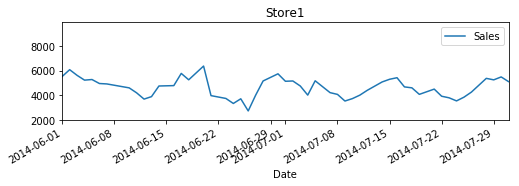

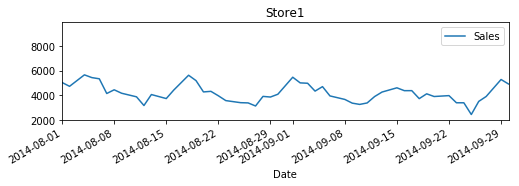

In [88]:
strain = train[train.Sales>0]
strain.Date=pd.to_datetime(strain.Date,errors='coerce')
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])



## Data preprocessing

In [89]:

store.fillna(0, inplace=True)
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')
train = train.sort_values(['Date'],ascending = False)
ho_test = train[:6*7*1115]
ho_train = train[6*7*1115:]
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]
print(ho_test.head())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

        Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           1          5  2015-07-31   5263        555     1      1   
679364    747          5  2015-07-31  10708        826     1      1   
702362    772          5  2015-07-31   5224        635     1      1   
683890    752          5  2015-07-31   7763        565     1      1   
17714      20          5  2015-07-31   9593        974     1      1   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                 0              1         c          a               1270.0   
679364            0              1         c          c              45740.0   
702362            0              1         d          c               1850.0   
683890            0              1         a          a                970.0   
17714             0              0         d          a               2340.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                    

## fit linear regression for the first time to predict the sale

In [90]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle


labelencoder=LabelEncoder()
for col in ho_train.columns:
    ho_train[col]=labelencoder.fit_transform(ho_train[col].astype(str))
regr = linear_model.LinearRegression()

X_train=ho_train.drop('Sales', axis=1)
y_train=ho_train['Sales']
regr.fit(X_train, y_train)
for col in ho_test.columns:
    ho_test[col]=labelencoder.fit_transform(ho_test[col].astype(str))

X_test=ho_test.drop('Sales', axis=1)
y_test=ho_test['Sales']
pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("R Square is: ")
print(regr.score(X_test, y_test))#Linear Regression cannot be used

Coefficients: 
 [-1.02913671e-01  1.27352741e+02 -2.96168275e-01  1.76519810e+00
  1.33404399e-12 -4.92711681e+02 -7.41351118e+02 -3.23582406e+01
  4.80980795e+01 -1.98098558e+02  1.72091511e-01  4.04886851e+00
 -1.92459273e+00  1.54978940e+02 -1.18190069e+01  4.11068031e+01
 -7.24965985e+00]
Mean squared error: 49865487.39
Variance score: -6.04
R Square is: 
-6.044851338450407


## Use a shuffled, smaller data subset for linear regression model

In [91]:
#maybe use a smaller but shuffled dataset that includes a general picture of the dataset for model fitting and use it for prediction
from sklearn.utils import shuffle
shuffle(ho_train,random_state=0)

X_train=ho_train.drop('Sales', axis=1).iloc[:100000,]
y_train=ho_train['Sales'].iloc[:100000,]
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

X_test=ho_test.drop('Sales', axis=1)
y_test=ho_test['Sales']
pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("R Square is: ")
print(regr.score(X_test, y_test))#Linear Regression cannot be used
#This fits better

Coefficients: 
 [-7.32324854e-02  1.28042859e+02 -1.81724025e-01  1.85397668e+00
  8.17124146e-13 -8.69547762e+02 -6.03506171e+02 -5.66524305e+02
 -2.63639765e+01 -2.63663462e+02  1.17606070e-01 -1.40195889e+01
  7.45062620e+00  2.91007410e+02 -1.84846501e+01  1.72736532e+01
  5.90037852e+01]
Mean squared error: 46237623.07
Variance score: -5.53
R Square is: 
-5.532317195183517


## drop some features and try linear regression-1


In [92]:
#drop features customers, competitionDistance, competitionOpenSinceYear,Promo2SinceWeek and try linear regression
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model

ho_train = train[6*7*1115:]

ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

labelencoder=LabelEncoder()
for col in ho_train.columns:
    ho_train[col]=labelencoder.fit_transform(ho_train[col].astype(str))
X_train=ho_train.drop('Sales', axis=1)
y_train=ho_train['Sales']
X_test=ho_test.drop('Sales', axis=1)
#print(X_train)
X_train=X_train.drop(['Customers','CompetitionDistance','CompetitionOpenSinceYear','Promo2SinceWeek'],axis=1)
X_test=X_test.drop(['Customers','CompetitionDistance','CompetitionOpenSinceYear','Promo2SinceWeek'], axis=1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("R Square is: ")
print(regr.score(X_test, y_test))#Linear Regression cannot be used
#This fits worse

Coefficients: 
 [-2.29654699e-02  1.50230594e+02 -2.31440040e-01 -3.33244543e-12
 -7.79531896e+02 -1.61263287e+03 -4.80651274e+01  2.75952539e+02
 -1.91028244e+02 -1.44392658e+01  4.46990394e+02  1.14384157e+01
  3.94212128e+00]
Mean squared error: 87562764.72
Variance score: -11.37
R Square is: 
-11.370613274200478


## Drop some features and try Linear Regression-2

In [93]:
#2. Keep Customers,Open, Promo, StateHoliday,SchoolHoliday,Assortment,Promo2
X_train=ho_train.drop('Sales', axis=1)
y_train=ho_train['Sales']
X_test=ho_test.drop('Sales', axis=1)
y_test=ho_test['Sales']
X_train=X_train.drop(['Store','DayOfWeek','Date','StoreType','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

X_test=X_test.drop(['Store','DayOfWeek','Date','StoreType','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis=1)
pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("R Square is: ")
print(regr.score(X_test, y_test))#Linear Regression cannot be used
#This fits slightly better than previous model but still worse than the original model
#we should start feature engineering

Coefficients: 
 [ 1.77331480e+00 -2.84217094e-13 -6.23065106e+02 -7.48122519e+02
 -1.01216516e+02 -1.79355021e+02  1.92878646e+02]
Mean squared error: 48023468.40
Variance score: -5.78
R Square is: 
-5.784616240500214


## Covariance Matrix for Correlation Detection

In [94]:
X_train=ho_train.drop('Sales', axis=1)
y_train=ho_train['Sales']
X_test=ho_test.drop('Sales', axis=1)

In [95]:
#Covariance matrix
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_test)

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

#Eigendecomposition of the standardized data based on the correlation matrix:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00002483e+00 -6.49128553e-04 -3.16886001e-04  8.28262376e-03
   0.00000000e+00  4.19802310e-05  0.00000000e+00  1.47196676e-02
  -1.91767597e-02 -3.14078451e-02  3.31601647e-02 -8.68633571e-03
   2.18612757e-03 -4.70471951e-02 -6.04761899e-02 -4.74850494e-02
  -4.52000192e-02]
 [-6.49128553e-04  1.00002483e+00 -1.89830999e-03  1.89601286e-02
   0.00000000e+00 -2.52877051e-01  0.00000000e+00 -1.89116409e-01
  -2.87805048e-03  2.84818944e-03 -1.12866173e-03  1.05658848e-04
  -3.30566984e-04 -4.58492372e-03 -4.05754554e-03 -2.50501860e-03
  -3.72023405e-03]
 [-3.16886001e-04 -1.89830999e-03  1.00002483e+00  1.57459670e-04
   0.00000000e+00  2.90145329e-01  0.00000000e+00  4.92584923e-01
   7.58621737e-04  2.91031136e-04  1.16749850e-03 -8.08121246e-04
  -5.58453399e-04  3.14909034e-04  6.06227762e-04 -4.39448564e-04
   5.44872636e-04]
 [ 8.28262376e-03  1.89601286e-02  1.57459670e-04  1.00002483e+00
   0.00000000e+00 -5.10374430e-02  0.00000000e+00  1.50354052e-02


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
#eigendecomposition on the covariance matrix:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[-4.19453917e-02  1.12090428e-02 -2.29858837e-02  6.28613942e-02
   4.67108712e-03  1.57432430e-01  7.70151185e-01  3.55809287e-01
   4.96296597e-01 -6.68669270e-03 -7.73752453e-03 -3.57097069e-02
   8.58128818e-03  3.64841370e-02  5.85316123e-04  0.00000000e+00
   0.00000000e+00]
 [ 5.15423275e-03 -2.84487941e-01 -9.58619421e-02  3.52131552e-02
   1.69288915e-03  6.86917543e-01 -4.77628487e-02 -4.11414214e-01
   1.64240057e-01  1.07641294e-03 -7.19460361e-03  1.20063688e-01
   2.49607486e-01 -1.54185794e-01  3.71064526e-01  0.00000000e+00
   0.00000000e+00]
 [-1.80180038e-02  5.19256031e-01  1.51400118e-01 -6.59251848e-02
  -6.70771654e-03  4.24205606e-01 -6.16581126e-02 -2.02412933e-01
   1.06534428e-01 -8.63918452e-04  1.97283991e-02 -2.70769246e-01
  -5.96062931e-01 -9.25856058e-02 -1.70568621e-01  0.00000000e+00
   0.00000000e+00]
 [ 5.60175056e-02 -4.42412247e-03 -9.80547945e-02 -2.74865678e-01
   7.78120692e-03  4.44489244e-01 -9.89096520e-02  6.55004984e-01
  -4.

Eigenvalues in descending order:
3.327879322926314
1.8182785214844237
1.7033050750052727
1.2547770106504046
1.0504318057735074
1.0272351027068032
0.9952598952714407
0.9137469304145409
0.7646212965941589
0.6643794032296135
0.48431396948437105
0.44642254984309426
0.2780381305332074
0.20508195586593173
0.06660141421930062
0.0
0.0


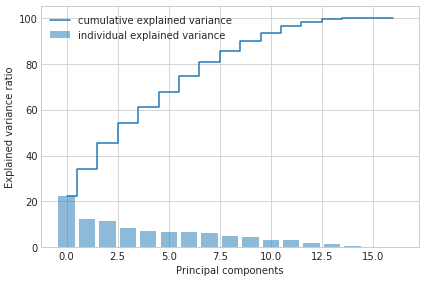

In [97]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(17), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(17), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


## use PCA to fit linear regression

In [98]:

from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


#Fit Logistic Regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("R Square is: ")
print(regr.score(X_test, y_test))#Linear Regression is still not doing well after PCA

Coefficients: 
 [-1.7919064   0.09494754 -0.3361697 ]
Mean squared error: 49127928.27
Variance score: -5.94
R Square is: 
-5.940651125834285


## Feature/target engineering

In [1]:
#reread in datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
#import xgboost as xgb
from time import time

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

train.head().append(train.tail())
test.head().append(test.tail())
store.head().append(store.tail())

display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())
test[pd.isnull(test.Open)]
store[pd.isnull(store.CompetitionDistance)]
store[pd.isnull(store.CompetitionOpenSinceMonth)].head(10)

NoPW = store[pd.isnull(store.Promo2SinceWeek)]
NoPW[NoPW.Promo2 != 0].shape

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

(0, 10)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


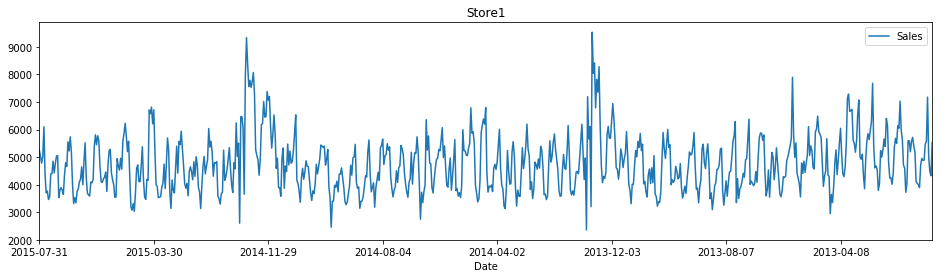

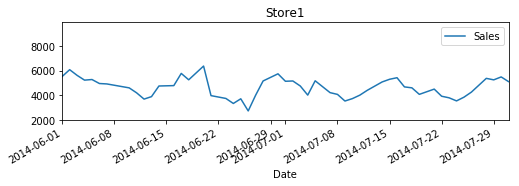

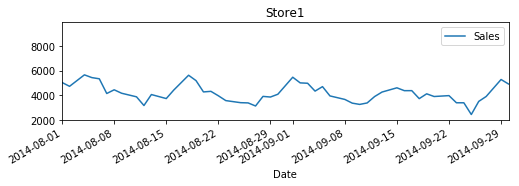

In [2]:
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(16,4))
strain = train[train.Sales>0]
strain.Date=pd.to_datetime(strain.Date,errors='coerce')
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])



In [2]:
test.fillna(1, inplace=True)
store.fillna(0, inplace=True)
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

train = train.sort_values(['Date'],ascending = False)
ho_test = train[:6*7*1115]
ho_train = train[6*7*1115:]

print(ho_train)
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]



Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
284584     314          5  2015-06-19   5032        562     1      1   
417104     458          5  2015-06-19   7362        688     1      1   
875290     961          5  2015-06-19   7764        768     1      1   
119580     132          5  2015-06-19   7964        692     1      1   
807974     887          5  2015-06-19   7776        632     1      1   
856818     941          5  2015-06-19   5048        572     1      1   
905823     994          5  2015-06-19   5886        536     1      1   
189376     210          5  2015-06-19   3591        345     1      1   
478010     525          5  2015-06-19   9482        810     1      1   
725586     797          5  2015-06-19   5726        517     1      1   
731996     804          5  2015-06-19   5454        434     1      1   
675822     743          5  2015-06-19   4498        482     1      1   
746332     820          5  2015-06-19  12765       1086     1   

## check data type

In [141]:
print(ho_train['StoreType'].unique())
print(ho_train['Assortment'].unique())
print(ho_train['StateHoliday'].unique())

['a' 'c' 'd' 'b']
['a' 'c' 'b']
['0' 'a' 'b' 'c' 0]


## Feature Engineering function

In [3]:
#feature engineering
def features_create(data):
    
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    data.Date=pd.to_datetime(data.Date,errors='coerce')
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +(data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +(data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
   
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data



In [4]:
#feature engineering
features_create(ho_train)
features_create(ho_test)
features_create(test)
print('Features creation finished')


Features creation finished


In [5]:
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)


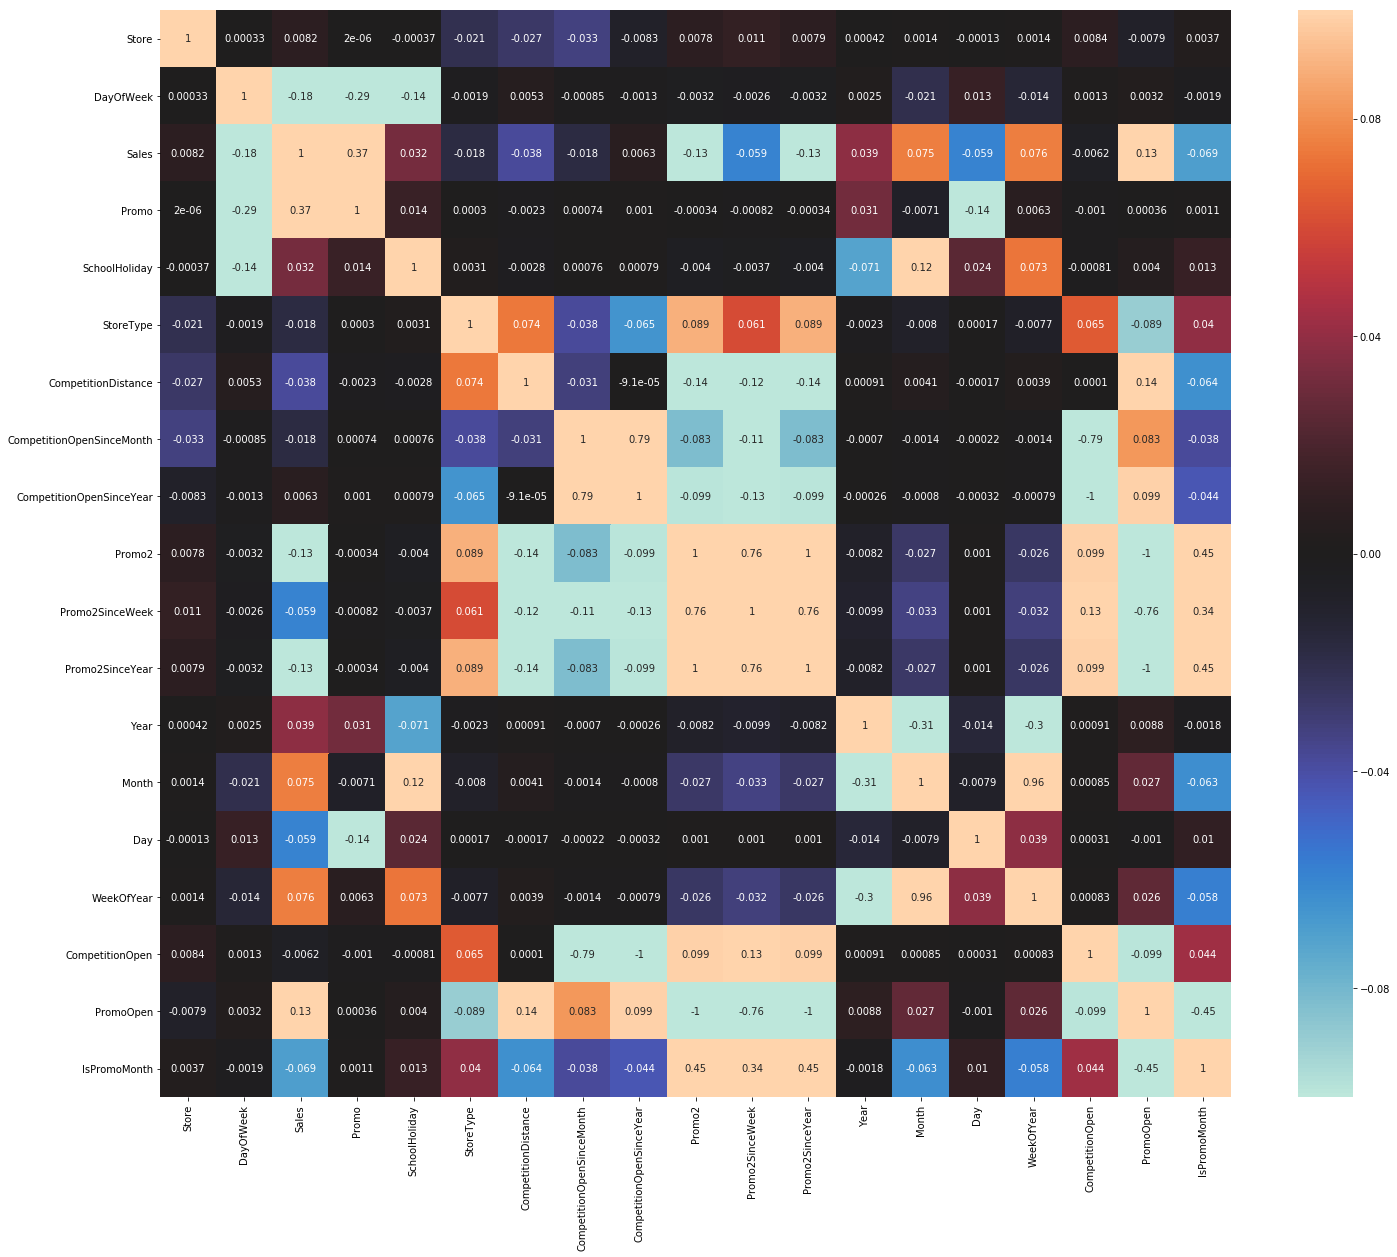

In [7]:
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

## try fitting linear regression again 

In [6]:

#fit linear regression to predict the sale

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import LabelEncoder
#from sklearn.utils import shuffle


#labelencoder=LabelEncoder()
#for col in ho_train.columns:
#    ho_train[col]=labelencoder.fit_transform(ho_train[col].astype(str))
regr = linear_model.LinearRegression()

X_train=ho_train.drop('Sales', axis=1)
y_train=ho_train['Sales']
regr.fit(X_train, y_train)
#for col in ho_test.columns:
#    ho_test[col]=labelencoder.fit_transform(ho_test[col].astype(str))

X_test=ho_test.drop('Sales', axis=1)
y_test=ho_test['Sales']
pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("R Square is: ")
print(regr.score(X_test, y_test))#Linear Regression is doing better but still not very well

Coefficients: 
 [ 4.43656434e-02 -1.34032924e+02  2.13165505e+03  1.27321808e+03
  8.94938855e+01 -6.29723312e+01  4.22083830e+02 -3.01293622e-02
 -3.38834650e+01  1.29419286e+02  2.39739116e+05  2.91803624e+01
  5.76151506e+02 -5.39551411e+02  6.77625142e+01 -3.75612566e+00
 -1.26829194e+01  1.07694735e+01  5.79937859e+01 -8.11950553e+01]
Mean squared error: 7324406.16
Variance score: 0.22
R Square is: 
0.21504926042180406


## target engineering and logistic regression model fitting

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40151
           1       0.00      0.00      0.00       131

   micro avg       1.00      1.00      1.00     40282
   macro avg       0.50      0.50      0.50     40282
weighted avg       0.99      1.00      1.00     40282


Confusion Matrix:
[[40151     0]
 [  131     0]]


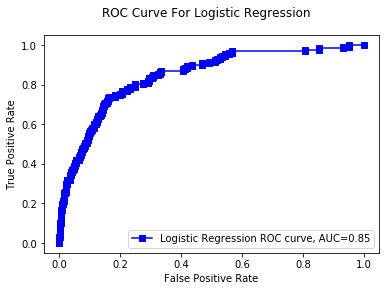

In [27]:
#try logistic regression again-maybe with normalized y data- 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm, metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
classifier = LogisticRegression(solver="lbfgs",max_iter=10000)

X_train=ho_train.drop('Sales', axis=1)
y_train=ho_train['Sales']
y_train=y_train.values.reshape(-1,1)
min_val=min(y_train)
max_val=max(y_train)
print(min(y_train))
print(max(y_train))
y_train=(y_train-min_val)/(max_val-min_val)
y_train=pd.DataFrame(y_train)
y_train=y_train.apply(lambda x: [1 if y >=0.5 else 0 for y in x])
print(y_train)
#y_train = preprocessing.normalize(y_train)
#print(pd.DataFrame(y_train).iloc[:,0].unique())
X_test=ho_test.drop('Sales', axis=1)
y_test=ho_test['Sales']
y_test=y_test.values.reshape(-1,1)
min_val=min(y_test)
max_val=max(y_test)
y_test=(y_test-min_val)/(max_val-min_val)
y_test=pd.DataFrame(y_test)
#y_test=preprocessing.normalize(y_test)
y_test=y_test.apply(lambda x: [1 if y >=0.5 else 0 for y in x])

classifier.fit(X_train,y_train)
# Fit the model
pred = classifier.predict(X_test)

# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (classifier, metrics.classification_report(y_test, pred)))
# Print out the confusion matrix. PS: edible is 0, poisonous is 1
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(y_test, pred,labels=[0, 1]))

#ROC curve
y_score = classifier.decision_function(X_test)
false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(false_positive, true_positive)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve For Logistic Regression')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="Logistic Regression ROC curve, AUC=%0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Multinomial Naive Bayes Model fitting

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     40151
           1       0.01      0.84      0.02       131

   micro avg       0.65      0.65      0.65     40282
   macro avg       0.50      0.74      0.40     40282
weighted avg       1.00      0.65      0.78     40282


Confusion Matrix:
[[26045 14106]
 [   21   110]]


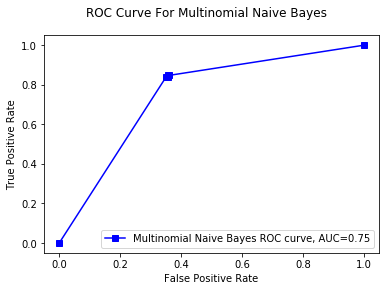

In [29]:
#try multinomial nb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm, metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

score=nb_classifier.score(X_test,y_test)
a = nb_classifier.predict(X_test)

# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (nb_classifier, metrics.classification_report(y_test, a)))
# Print out the confusion matrix.
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(y_test, a,labels=[0, 1]))

#ROC curve
y_score = nb_classifier.predict_proba(X_test)
false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score[:,1])
roc_auc = auc(false_positive, true_positive)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve For Multinomial Naive Bayes')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="Multinomial Naive Bayes ROC curve, AUC=%0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()#kernel died



## Linear SVC model Fitting

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40151
           1       0.00      0.00      0.00       131

   micro avg       1.00      1.00      1.00     40282
   macro avg       0.50      0.50      0.50     40282
weighted avg       0.99      1.00      1.00     40282


Confusion Matrix:
[[40151     0]
 [  131     0]]


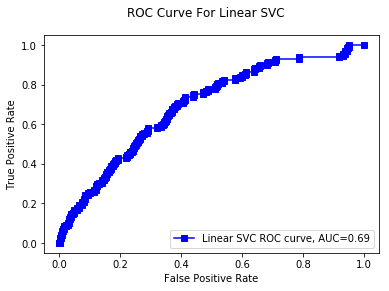

In [30]:
#try linear svm
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
#print(target[0])
test_true_label = y_test
test_predicted_label = clf.predict(X_test)

# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (clf, metrics.classification_report(test_true_label, test_predicted_label)))
# Print out the confusion matrix.
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(test_true_label, test_predicted_label,labels=[0, 1]))

#ROC curve
y_score = clf.decision_function(X_test)
false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(false_positive, true_positive)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve For Linear SVC')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="Linear SVC ROC curve, AUC=%0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Use data after target engineering to fit Linear Regression again

In [31]:
#linear regression again?
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("prediction accuracy is: ")
print(regr.score(X_test, y_test))#Linear Regression is doing worse after target engineering

Coefficients: 
 [[ 2.33550229e-06 -8.60513038e-04  5.91835722e-03  2.85132174e-02
  -5.09803924e-05 -1.85663481e-03  2.49389100e-03 -4.36490848e-07
  -6.18546753e-04 -5.65601239e-04  1.11778525e+00  3.88062386e-05
   3.57152221e-04 -1.16476152e-04  5.17358821e-04 -1.87964240e-05
  -7.57017037e-06 -4.72548477e-05  7.64247734e-05 -6.57021548e-04]]
Mean squared error: 0.00
Variance score: 0.00
prediction accuracy is: 
0.0008832458133891663


## Normalize target and try linear regression model fitting again

In [7]:
#how about normalizing target but not transforming target to 0-1?
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X_train=ho_train.drop('Sales', axis=1)
y_train=ho_train['Sales']
y_train=y_train.values.reshape(-1,1)
min_val=min(y_train)
max_val=max(y_train)
print(min(y_train))
print(max(y_train))
y_train=(y_train-min_val)/(max_val-min_val)
y_train=pd.DataFrame(y_train)
#y_train=y_train.apply(lambda x: [1 if y >=0.5 else 0 for y in x])
print(y_train)
#y_train = preprocessing.normalize(y_train)
#print(pd.DataFrame(y_train).iloc[:,0].unique())
X_test=ho_test.drop('Sales', axis=1)
y_test=ho_test['Sales']
y_test=y_test.values.reshape(-1,1)
min_val=min(y_test)
max_val=max(y_test)
y_test=(y_test-min_val)/(max_val-min_val)
y_test=pd.DataFrame(y_test)
#y_test=preprocessing.normalize(y_test)
#y_test=y_test.apply(lambda x: [1 if y >=0.5 else 0 for y in x])
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

pred=regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))
print("prediction accuracy is: ")
print(regr.score(X_test, y_test)) #still worse than the linear regression after only feature engineering

[46]
[38722]
               0
0       0.128917
1       0.189161
2       0.199555
3       0.204726
4       0.199866
5       0.129331
6       0.150998
7       0.091659
8       0.243976
9       0.146861
10      0.139828
11      0.115110
12      0.328860
13      0.114179
14      0.259825
15      0.201132
16      0.228772
17      0.199504
18      0.155057
19      0.180500
20      0.126176
21      0.120824
22      0.145387
23      0.211527
24      0.110482
25      0.149395
26      0.365808
27      0.248035
28      0.314510
29      0.084781
...          ...
804026  0.383623
804027  0.138975
804028  0.112318
804029  0.130055
804030  0.089177
804031  0.079015
804032  0.109267
804033  0.089177
804034  0.211165
804035  0.253904
804036  0.150429
804037  0.200822
804038  0.294679
804039  0.067225
804040  0.079300
804041  0.218533
804042  0.073974
804043  0.248138
804044  0.097606
804045  0.086074
804046  0.128995
804047  0.277149
804048  0.152937
804049  0.107922
804050  0.060890
804051  0.114929
8

## Use Random Forest to find the important features

In [10]:
#Feature Importance
#### Use Random Forests for Plot the Importance of Features

print(__doc__)

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


y_train=y_train.apply(lambda x: [1 if y >=0.5 else 0 for y in x])
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=25,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Automatically created module for IPython interactive environment


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Feature ranking:
1. feature 0 (0.200438)
2. feature 7 (0.183988)
3. feature 15 (0.082748)
4. feature 1 (0.072535)
5. feature 17 (0.070123)
6. feature 8 (0.066051)
7. feature 9 (0.060753)
8. feature 18 (0.050426)
9. feature 5 (0.049903)
10. feature 16 (0.049156)
11. feature 14 (0.033454)
12. feature 6 (0.019426)
13. feature 2 (0.013299)
14. feature 4 (0.012024)
15. feature 13 (0.012019)
16. feature 11 (0.010554)
17. feature 12 (0.007592)
18. feature 19 (0.002450)
19. feature 3 (0.002103)
20. feature 10 (0.000957)


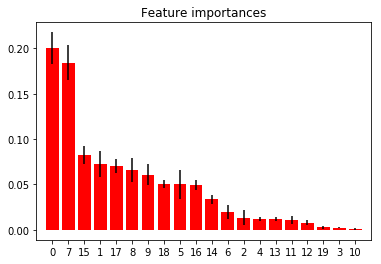

In [12]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

[ 0  7 15  1 17  8  9 18  5 16]


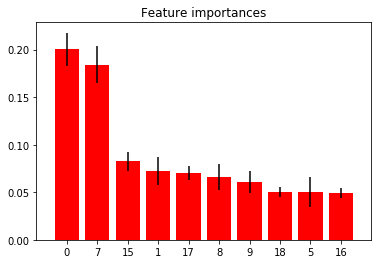

In [20]:
# Plot to show the most important 10 Features

p = importances[indices][:10]

q=indices[:10]
print(q)
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), p,
    color="r", yerr=std[q], align="center")
plt.xticks(range(10), q)
plt.xlim([-1,10])
plt.show()

## use the most important 10 features to fit logistic regression model

In [23]:
new_X_train=X_train.iloc[:,q]
print(new_X_train)
new_X_test=X_test.iloc[:,q]

         Store  CompetitionDistance  Day  DayOfWeek  CompetitionOpen  \
284584     314               3560.0   19          4            164.0   
417104     458               3390.0   19          4          24186.0   
875290     961               9430.0   19          4          24186.0   
119580     132               1040.0   19          4          24186.0   
807974     887              19700.0   19          4          24186.0   
856818     941               1200.0   19          4             42.0   
905823     994               2290.0   19          4             47.0   
189376     210                970.0   19          4            187.0   
478010     525               1870.0   19          4             21.0   
725586     797               2090.0   19          4             32.0   
731996     804               2100.0   19          4          24186.0   
675822     743               6710.0   19          4            139.0   
746332     820               1650.0   19          4          241

(804056, 10)
(804056, 1)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40151
           1       0.00      0.00      0.00       131

   micro avg       1.00      1.00      1.00     40282
   macro avg       0.50      0.50      0.50     40282
weighted avg       0.99      1.00      1.00     40282


Confusion Matrix:
[[40151     0]
 [  131     0]]


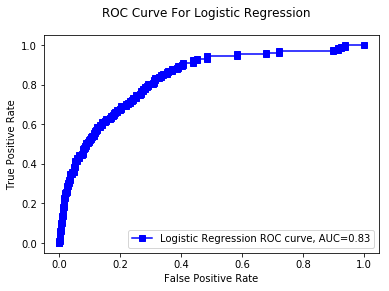

In [24]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm, metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

classifier = LogisticRegression(solver="lbfgs",max_iter=10000)

y_test=y_test.apply(lambda x: [1 if y >=0.5 else 0 for y in x])
print(new_X_train.shape)
print(y_train.shape)
classifier.fit(new_X_train,y_train)
# Fit the model
pred = classifier.predict(new_X_test)

# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (classifier, metrics.classification_report(y_test, pred)))
# Print out the confusion matrix. PS: edible is 0, poisonous is 1
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(y_test, pred,labels=[0, 1]))

#ROC curve
y_score = classifier.decision_function(new_X_test)
false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(false_positive, true_positive)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve For Logistic Regression')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="Logistic Regression ROC curve, AUC=%0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Use the 10 most important features to fit Naive Bayes

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
              precision    recall  f1-score   support

           0       1.00      0.66      0.80     40151
           1       0.01      0.84      0.02       131

   micro avg       0.66      0.66      0.66     40282
   macro avg       0.50      0.75      0.41     40282
weighted avg       1.00      0.66      0.79     40282


Confusion Matrix:
[[26568 13583]
 [   21   110]]


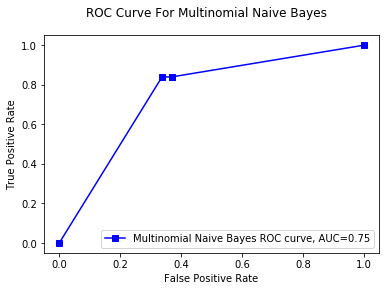

In [25]:
#try multinomial nb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm, metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


nb_classifier = MultinomialNB()

nb_classifier.fit(new_X_train, y_train)

score=nb_classifier.score(new_X_test,y_test)
a = nb_classifier.predict(new_X_test)

# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (nb_classifier, metrics.classification_report(y_test, a)))
# Print out the confusion matrix.
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(y_test, a,labels=[0, 1]))

#ROC curve
y_score = nb_classifier.predict_proba(new_X_test)
false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score[:,1])
roc_auc = auc(false_positive, true_positive)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve For Multinomial Naive Bayes')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="Multinomial Naive Bayes ROC curve, AUC=%0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()#kernel died



## Use the 10 most important features to fit Linear SVC

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40151
           1       0.00      0.00      0.00       131

   micro avg       1.00      1.00      1.00     40282
   macro avg       0.50      0.50      0.50     40282
weighted avg       0.99      1.00      1.00     40282


Confusion Matrix:
[[40151     0]
 [  131     0]]


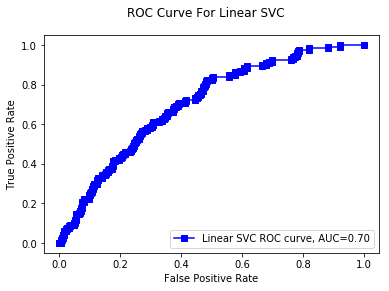

In [26]:
#try linear svc
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(new_X_train, y_train)
#print(target[0])
test_true_label = y_test
test_predicted_label = clf.predict(new_X_test)

# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (clf, metrics.classification_report(test_true_label, test_predicted_label)))
# Print out the confusion matrix.
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(test_true_label, test_predicted_label,labels=[0, 1]))

#ROC curve
y_score = clf.decision_function(new_X_test)
false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(false_positive, true_positive)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve For Linear SVC')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="Linear SVC ROC curve, AUC=%0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
